## Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

# 1. Loading and Preprocessing 
 Load the dataset and perform necessary preprocessing steps.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
# Load the dataset
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [2]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
## Display summary statistics
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

## Check for Missing Values
Identify and handle missing values.

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


##  Convert Categorical Variables

Convert categorical variables into numerical format using one-hot encoding or label encoding.



In [5]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Display the new shape of the dataset after encoding
print("\nShape after encoding categorical variables:", data.shape)


Shape after encoding categorical variables: (205, 191)


# **checking** outlier

In [15]:
nu=data.select_dtypes("number")
nu.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

<Axes: >

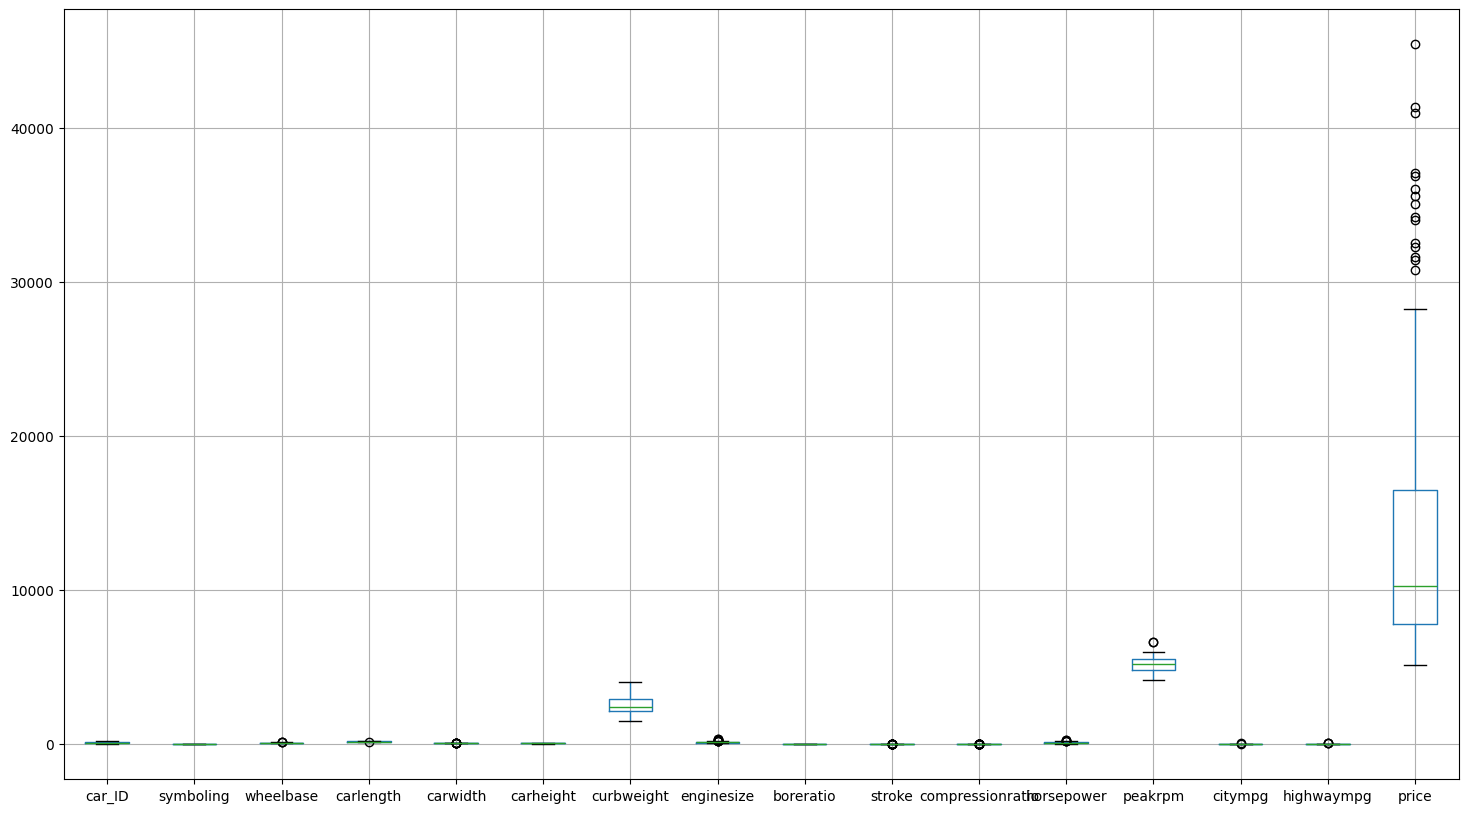

In [16]:
plt.figure(figsize=(18, 10))
nu.boxplot()

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

<Figure size 1800x1000 with 0 Axes>

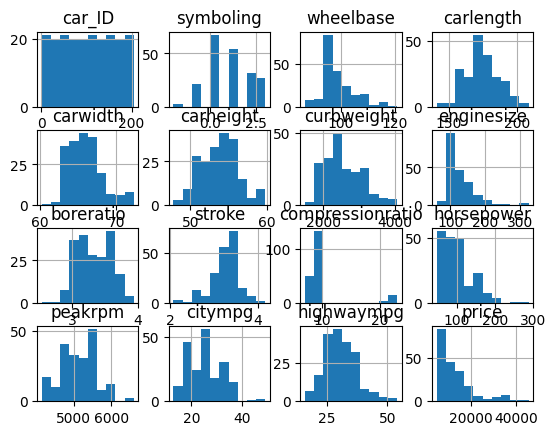

In [17]:
plt.figure(figsize=(18, 10))
nu.hist()

# **visualization**

In [20]:
corr=nu.corr()
import seaborn as sns
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: >

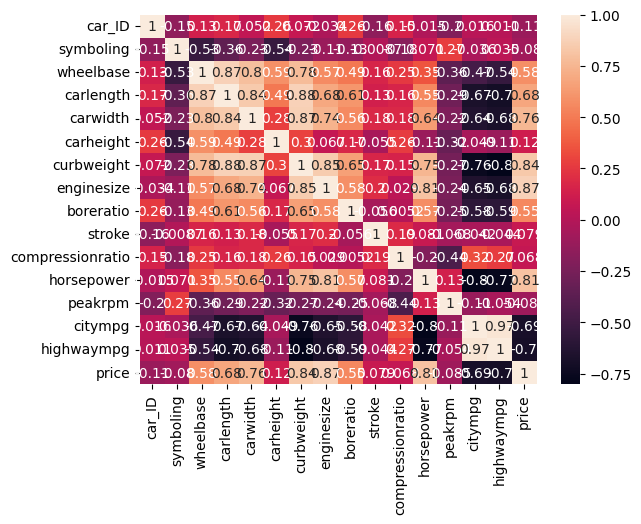

In [21]:
sns.heatmap(corr,annot=True)

## Feature scaling


In [6]:
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
features = data.drop(['car_ID',  'price'], axis=1)  # Drop ID and target
target = data['price']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



# Replace features in the data with the scaled version
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['price'] = data['price'].values


# Display the final preprocessed dataset
print("\nFinal preprocessed dataset:")
print(data_scaled.head())


Final preprocessed dataset:
   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  ...  \
0    0.074449   0.519071 -1.839377         -0.288349  ...   
1    0.074449   0.519071 -1.839377         -0.288349  ...   
2    0.604046  -2.404880  0.685946         -0.288349  ...   
3   -0.431076  -0.517266  0.462183         -0.035973  ...   
4    0.218885  -0.517266  0.462183         -0.540725  ...   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0              -0.070014           -0.141069        -0.689072   
1              -0.070014           -0.141069   

# 2. Model Implementation 
 Implement the following five regression algorithms:

## Split the Data


In [32]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_scaled.drop('price', axis=1)  # Features
y = data_scaled['price']  # Target variable
print(X.shape[0])
print(y.shape[0])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


205
205
Training set size: 164
Testing set size: 41


## 1 Linear Regression

In [33]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# Step 2: Create a Linear Regression model
linear_model = LinearRegression()

# Step 3: Fit the model on the training data
linear_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Step 5: Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 48759203336080624.00
Mean Squared Error (MSE): 8018430164268343996149650639814656.00
R-squared: -101571088917445002211098624.00


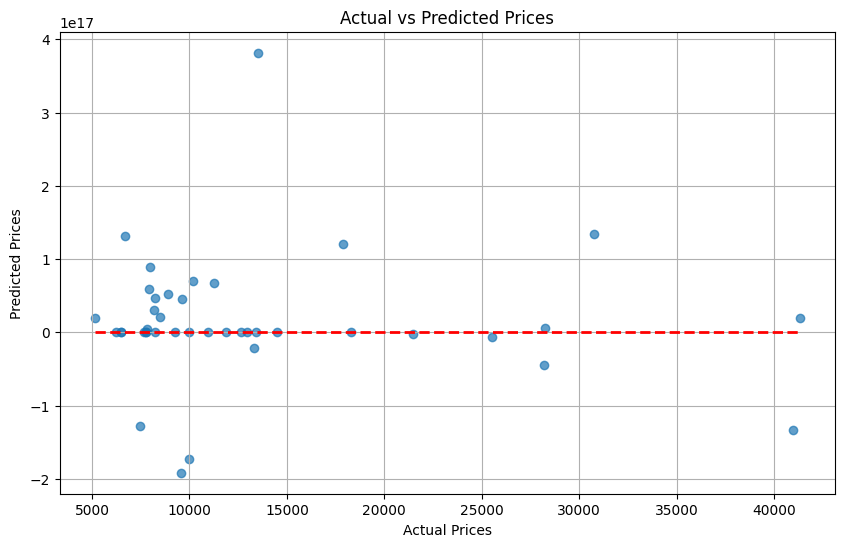

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # line for perfect predictions
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


## Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Decision Tree Regressor:")

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')



Decision Tree Regressor:
Mean Squared Error: 11376015.613509487
R² Score: 0.855897691975291


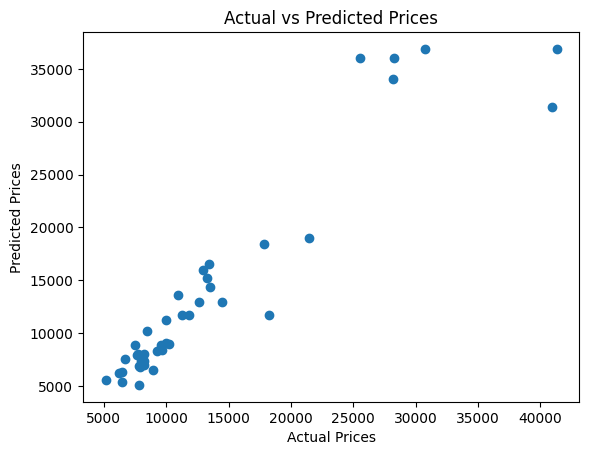

In [38]:

#Visualise the result
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


results indicate a good fit for your Decision Tree Regressor model:

Mean Squared Error (MSE): 11,376,015.6111,376,015.61 suggests that the average squared difference between the predicted and actual values is relatively high. This value can be difficult to interpret on its own, but lower values are generally better.

R² Score: 0.86 means that approximately 86% of the variance in the target variable (price) can be explained by the model. This is a strong R² score, indicating that your model captures a significant amount of the underlying trend in the data.



## Random Forest Regressor

The Random Forest Regressor is an ensemble learning method that can provide better predictive performance than a single decision tree by aggregating the results from multiple trees. Here's how you can implement and evaluate a Random Forest Regressor:



In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Random Forest Regressor
Mean Squared Error: 3682803.218505951
R² Score: 0.9533491811353261


Mean Squared Error: A lower MSE indicates that the model's predictions are closer to the actual values. In this case, the MSE is significantly lower than that of the Decision Tree Regressor, suggesting that the Random Forest model is better at making predictions.

R² Score: An R² score of 0.9533 means that approximately 95.33% of the variance in the target variable is explained by the model. This is a strong indication that the Random Forest Regressor is capturing the underlying patterns in the data effectively.



## Gradient Boosting Regressor

Gradient Boosting is another powerful ensemble method that builds trees sequentially, with each new tree correcting errors made by the previous ones. It's generally effective for reducing bias, making it a good option for further improving performance.



In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Gradient Boosting Regressor
Mean Squared Error: 5463056.220005656
R² Score: 0.930798353578499


Mean Squared Error (MSE): 5,463,056 — This is higher than Random Forest's MSE but lower than the Decision Tree’s, indicating that Gradient Boosting strikes a balance, though it doesn’t outperform Random Forest in this case.
R² Score: 0.9308 — This is slightly lower than Random Forest's R² score (0.9533) but higher than Decision Tree’s, meaning it still captures a significant portion of the target variance.

## Support Vector Regressor

This model often requires careful tuning, particularly for the C, epsilon, and kernel parameters, as it tends to perform best on smaller, well-scaled datasets. 


In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Standardize features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # You may adjust C and epsilon as needed
svr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svr = svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor Mean Squared Error: {mse_svr}")
print(f"Support Vector Regressor R² Score: {r2_svr}")


Support Vector Regressor Mean Squared Error: 84231986.33935304
Support Vector Regressor R² Score: -0.0669837360799792


The results indicate that the Support Vector Regressor (SVR) model is currently not performing well:

Mean Squared Error (MSE): The MSE of approximately 84,231,986 suggests that the model's predictions are far off from the actual values, with a higher error indicating poor performance.

R² Score: An R² score of -0.067 means the model is underperforming even worse than a simple mean prediction. A negative R² value indicates that the model's predictions are less accurate than a baseline model that predicts the average of the target variable.



# 3. Model Evaluation

1. Linear Regression
MAE and MSE values are extremely large, and the R² score is a highly negative value.
Interpretation: This model is clearly underperforming, suggesting that the data may not be linearly separable, or there may be extreme outliers affecting the fit. Linear regression is not suitable in this case.

2. Decision Tree Regressor
MSE: 11,376,015.61
R² Score: 0.856
Interpretation: Decision Tree performs fairly well with a relatively high R² score, capturing about 85.6% of the variance in the target variable. However, the MSE is still higher than that of the Random Forest and Gradient Boosting, suggesting some overfitting.

3. Random Forest Regressor
MSE: 3,682,803.22
R² Score: 0.953
Interpretation: Random Forest provides the best performance among all models tested so far, with an excellent R² score of 0.953 and a low MSE. This indicates it captures a strong relationship with minimal overfitting.

4. Gradient Boosting Regressor
MSE: 5,463,056.22
R² Score: 0.931
Interpretation: Gradient Boosting also performs well, with an R² score of 0.931. However, its MSE is slightly higher than that of Random Forest, which indicates that while it’s performing well, it may not generalize quite as effectively as the Random Forest.

5. Support Vector Regressor
MSE: 84,231,986.34
R² Score: -0.067
Interpretation: SVR is underperforming compared to the other models. The negative R² score indicates that it’s not suitable for this dataset and could be improved through parameter tuning or feature scaling.



The Random Forest Regressor stands out as the best model here, with the lowest MSE and the highest R² score, suggesting it captures the data's variance well with good generalization.


# 4. Feature Importance Analysis

visualize the feature importances using both Random Forest Regressor and Gradient Boosting Regressor. 

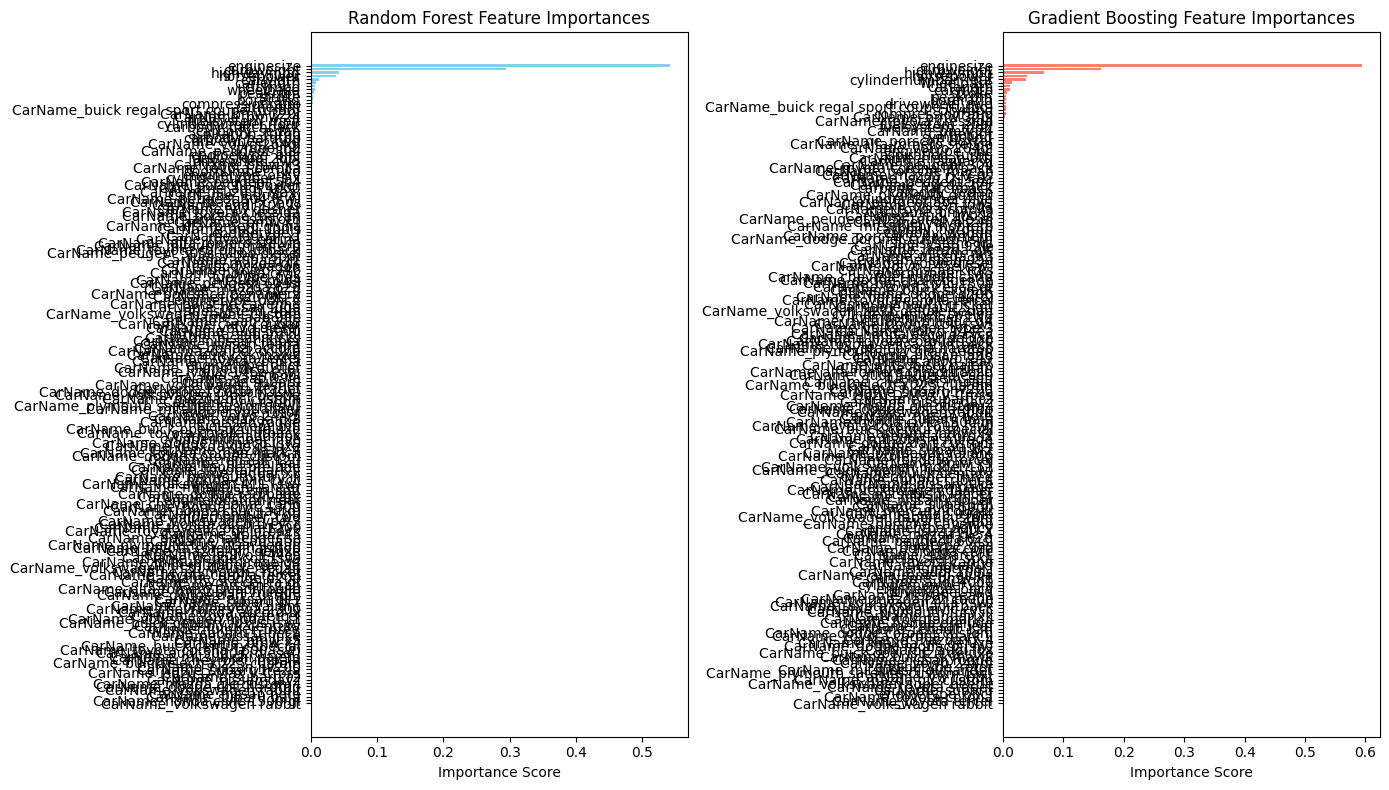

Top features according to Random Forest:
                 Feature  Random Forest Importance
6             enginesize                  0.540808
5             curbweight                  0.294927
13            highwaympg                  0.043387
10            horsepower                  0.038275
177  cylindernumber_four                  0.001381
1              wheelbase                  0.006204
2              carlength                  0.007710
3               carwidth                  0.013358
8                 stroke                  0.004195
11               peakrpm                  0.005753

Top features according to Gradient Boosting:
                 Feature  Gradient Boosting Importance
6             enginesize                      0.594402
5             curbweight                      0.162179
13            highwaympg                      0.068139
10            horsepower                      0.040115
177  cylindernumber_four                      0.037627
1              wheelba

In [46]:
# Get feature importances from Random Forest and Gradient Boosting models
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_


# Create a DataFrame to hold feature names and importances
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': rf_importances,
    'Gradient Boosting Importance': gb_importances
})

# Sort the DataFrame by each model's importance scores
importance_df = importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Plot feature importances for both models
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Plot for Random Forest
axs[0].barh(importance_df['Feature'], importance_df['Random Forest Importance'], color='skyblue')
axs[0].set_title('Random Forest Feature Importances')
axs[0].set_xlabel('Importance Score')
axs[0].invert_yaxis()  # To have the most important feature on top


# Plot for Gradient Boosting
importance_df = importance_df.sort_values(by='Gradient Boosting Importance', ascending=False)
axs[1].barh(importance_df['Feature'], importance_df['Gradient Boosting Importance'], color='salmon')
axs[1].set_title('Gradient Boosting Feature Importances')
axs[1].set_xlabel('Importance Score')
axs[1].invert_yaxis()



plt.tight_layout()
plt.show()


# Display top features by both models
print("Top features according to Random Forest:")
print(importance_df[['Feature', 'Random Forest Importance']].head(10))

print("\nTop features according to Gradient Boosting:")
print(importance_df[['Feature', 'Gradient Boosting Importance']].head(10))


Both the Random Forest and Gradient Boosting models indicate that engine size, curb weight, highway mpg, and horsepower are the top predictors of car prices, with engine size being the most influential in both models. 

# 5. Hyperparameter Tuning

Perform hyperparameter tuning and check whether the performance of the model has increased.

Explanation
Parameter Grid: Specifies a range of values for each hyperparameter, allowing the grid search to explore combinations and find the optimal set.
Grid Search: GridSearchCV performs exhaustive search over the specified parameter grid.
Model Evaluation: After tuning, we evaluate the optimized models on the test data to compare performance improvements.
Best Parameters: We print the optimal parameters found for each model, which may be useful for further experimentation or documentation.


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define parameter grids for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}


# Random Forest tuning
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Gradient Boosting tuning
gb = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Get the best models from tuning
best_rf = rf_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_


# Evaluate the tuned models on the test set
for model_name, model in [("Random Forest Regressor", best_rf), ("Gradient Boosting Regressor", best_gb)]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} after tuning:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}\n")


# Check best parameters
print("Best parameters for Random Forest Regressor:", rf_grid_search.best_params_)
print("Best parameters for Gradient Boosting Regressor:", gb_grid_search.best_params_)




Random Forest Regressor after tuning:
Mean Squared Error (MSE): 3596994.9149571024
R-squared: 0.9544361324027267

Gradient Boosting Regressor after tuning:
Mean Squared Error (MSE): 5022372.098743881
R-squared: 0.9363805891468338

Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}


Both models improved after hyperparameter tuning, with the Random Forest Regressor achieving the best performance.
The Random Forest model may be the preferred choice for this task due to its superior MSE and R-squared score.
It might be useful to further investigate feature importance again with these tuned models to see if the significant variables remain consistent.
